# Summary:
**R2 value & RMSLE conclusion:**
* For Decision Tree model, we got Train R2 = 0.766 & Test R2 = 0.583, RMSLE = 0.453
* For Random Forest model, we got Train R2 = 0.804 & Test R2 = 0.649, RMSLE = 0.402 <br>

**5 most impactful variables:**<br>
According to Random Forest model, 5 most important variables are:<br>
1. Transmission_Manual
2. Car_Age
3. Kms_Driven
4. Fuel_Type_Diesel
5. Car_Type_Land <br>

**Highlights:** <br>
**1.** Removal of duplicate values & other necessary preprocessing <br>
**2.** Extensive EDA using plotly <br>
**3.** Feature Extraction & Feature Removal <br>
**4.** Multivariate Outlier Analysis (LOF) <br>
**5.** Correlation Analysis using Pearson, Spearman, Chi2, Cramers'V, Theil's U <br>
**6.** Select K best technique(F_Regression) including hypothesis testing to judge Feature Importance <br>
**7.** Pre-Model Building Steps (Train-Test split, MinMax normalization, One Hot encoding) <br>
**8.** Implemented Models are: <br>
(i.) Linear Regression using OLS (un-reliable here) <br>
(ii.) Decision Tree (with optimized Max Depth hyperparameter through Cross Validation) <br>
(iii.) Random Forest & Feature Importance Analysis (with optimized hyperparameters through RandomizedSearchCV) <br>

### Importing Libraries:

In [ ]:
import warnings
import numpy as np
import pandas as pd
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
warnings.filterwarnings('ignore')
from scipy.stats import spearmanr
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor

### Given Dataframe:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardekho - cardekho.csv to cardekho - cardekho.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cardekho - cardekho.csv']))
df.head()

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


## Exploratory Data Analysis:

### Shape of Dataframe:

In [ ]:
print('dataframe has {} rows & {} columns' .format(df.shape[0], df.shape[1]))

dataframe has 4340 rows & 8 columns


### All Columns in DataFrame:

In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

### Checking duplicate values:

In [ ]:
df.duplicated(keep='first').sum()

761

### Which are the duplicated rows?

In [ ]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


### Removal of Duplicates:

In [ ]:
df.drop_duplicates(inplace=True)

### Now duplicate count is:

In [ ]:
count = df.duplicated().sum()
print('now duplicate count is = ', count)
print('After removal of duplicates, dataframe has {} rows & {} columns' .format(df.shape[0], df.shape[1]))

now duplicate count is =  0
After removal of duplicates, dataframe has 3579 rows & 8 columns


### Checking null values:

In [ ]:
df.isna().sum(axis=0)

Car_Name         0
Year             0
Selling_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There is no null values in given dataframe

### What are different datatypes of all columns?

In [ ]:
df.dtypes.value_counts()

object    5
int64     3
dtype: int64

we can see both object type & integer dataypes are present in given dataset

### Which one are the Non-Numeric Columns?

In [ ]:
catg_ip_cols = df.select_dtypes(exclude='number').columns.to_list()
catg_ip_cols

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

### Statistical Description of Non-Numerical Columns:

In [ ]:
df.select_dtypes(exclude='number').describe()

,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner
count,3579,3579,3579,3579,3579
unique,1491,5,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,54,1798,2833,3267,2221


**<u>Insight</u>**: 
* by looking at unique values of "Fuel_Type", "Seller_Type", "Transmission", "Owner"; we can see there exist very less number of unique values.
* so we will convert datatype of above 4 features to category datatype

### Converting object datatype to category datatype:

In [ ]:
df['Fuel_Type']    = df['Fuel_Type'].astype('category')
df['Seller_Type']  = df['Seller_Type'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')
df['Owner']        = df['Owner'].astype('category')

In [ ]:
df.dtypes

Car_Name           object
Year                int64
Selling_Price       int64
Kms_Driven          int64
Fuel_Type        category
Seller_Type      category
Transmission     category
Owner            category
dtype: object

### Creating new column as Car Age (Feature Extraction):

In [ ]:
current_year = 2023
df['Car_Age'] = current_year - df['Year']

### Dropping Year Column:

In [ ]:
df.drop('Year', axis=1, inplace=True)

In [ ]:
print('now dataframe has {} rows & {} columns' .format(df.shape[0], df.shape[1]))

now dataframe has 3579 rows & 8 columns


### What are the available numerical columns?

In [ ]:
num_cols = df.select_dtypes(include='number').columns.to_list()
num_op_col = ['Selling_Price']
num_ip_cols = ['Car_Age', 'Kms_Driven']

### Statistical Description of Numerical Columns:

In [ ]:
df.describe()

,Selling_Price,Kms_Driven,Car_Age
count,3.579000e+03,3579.000000,3579.000000
mean,4.743225e+05,69211.568036,10.027941
std,5.092159e+05,47586.922658,4.252616
min,2.000000e+04,1.000000,1.000000
25%,2.000000e+05,36000.000000,7.000000
50%,3.500000e+05,60000.000000,10.000000
75%,6.000000e+05,90000.000000,13.000000
max,8.900000e+06,806599.000000,31.000000


**<u>Insight</u>**: 
* This dataset contains information from year 1992 to 2022
* For Selling_Price; **(std/mean) > 1**; so for this column mean is not reliable

## Visualization of Given Dataframe:

### Most Frequent Car in CarDekho:

In [ ]:
px.histogram(data_frame=df, x=catg_ip_cols[0], category_orders=df['Car_Name'].value_counts().index, 
             title='Count of all Cars in Cardekho (1992-2022)')

**<u>Insight</u>**: <br> 
Among these 30 years; **Maruti Swift Dzire VDI** has been launched for the most number of times in CarDekho; followed by **Maruti Alto 800 LXI** 

### Creating a new column as Car Brand (Feature Construction):

In [ ]:
def car_type(data):
    return data['Car_Name'].split(' ')[0]
df['Car_Type'] = df.apply(car_type, axis=1)
# Alternate Way: df['Car_Name'].str.split(n=1).str[0]

### Brand wise Count:

In [ ]:
ser1 = df['Car_Type'].value_counts()
df1 = pd.DataFrame()
px.histogram(ser1, x=ser1.index, y=ser1.values, title='Count of Varities of Car', 
             labels=dict(index='Car Brands')).update_layout(yaxis_title="Count")

In 30 years; cars of Maruti brand were mostly lauched in CarDekho followed by Hyundai & Mahindra

### Visualization of Histograms for Numerical Columns:

In [ ]:
fig = px.histogram(df, x=num_ip_cols[0], title='Histogram of Car Age')
fig.update_layout(bargap=0.2)
fig.update_traces(marker = dict(color='orange'))
fig.show()

**<u>Insight</u>**: <br>
* The above histogram of Year seems to be right skewed.
* Later we can apply log transformation on it to make it close to Normal to get better result in Linear Regression
* But this transformation will be held after train-test split.

In [ ]:
fig = px.histogram(df, x=num_ip_cols[1], title='Histogram of Kms_Driven')
fig.update_layout(bargap=0.4)
fig.update_traces(marker = dict(color='magenta'))
fig.show()

**<u>Insight</u>**: <br>
* The above histogram of Kms_Driven seems to be right skewed.
* Later we can apply log transformation to make it close to Normal to get better result in Linear Regression
* But this transformation will be held after train-test split.

In [ ]:
fig = px.histogram(df, x=num_op_col, title='Histogram of Selling_Price')
fig.update_layout(bargap=0.2)
fig.update_traces(marker = dict(color='red'))
fig.show()

The above histogram of Selling Price seems to be right skewed.

### Which car has the highest Selling Price?

In [ ]:
px.histogram(df, x='Car_Name', y='Selling_Price')

Among all cars, Maruti Swift Dzire VDI has the highest selling price in CarDekho

### Brand Wise Selling Price:

In [ ]:
df1 = df[['Car_Type', 'Selling_Price']]
fig = px.histogram(df1, x=df1['Car_Type'], y=df1['Selling_Price'])
fig.update_traces(marker = dict(color='grey'))

Among all carbrands in Cardekho; Maruti brand has the highest selling price

### Fuel Type Vs. Selling Price:

In [ ]:
df1 = df.groupby('Fuel_Type').agg({'Selling_Price':'mean'})
fig = px.histogram(df1, x=df1.index, y='Selling_Price', title='Fuel Type vs Selling Price')
fig.update_traces(marker = dict(color='orange'))
fig.update_layout(bargap=0.2)

Electric Cars have the maximum Selling price

### Car Names vs Km_Driven:

In [ ]:
px.histogram(df, x='Car_Name', y='Kms_Driven', title='Cars vs Kms_Driven')

Maruti Swift Dzire VDI car had travelled the max km among all cars

### Total Number of Manual / Automatic Cars in CarDekho:

In [ ]:
ser = df['Transmission'].value_counts(normalize=True)*100
go.Figure(data=[go.Pie(labels=ser.index, values=ser.values, pull=[.1,0], 
                       title='% dustribution based on Transmission')])

In Cardekho, the manual cars are mostly sold in comparison to Automatic Cars

### Owner Wise count of Cars:

In [ ]:
fig = px.histogram(df, x='Owner', title='Owner wise count of Cars')
fig.update_traces(marker = dict(color='goldenrod'))

In Cardekho, maximum cars have the owner type of first owner <br>
there are very less number of Test Drive cars

### Selling Price of Cars based on Seller_Type:

In [ ]:
df1 = df.groupby('Seller_Type').agg({'Selling_Price':'sum'})
df1.reset_index(inplace=True)
fig = px.histogram(df1, x='Seller_Type', y='Selling_Price', title='Seller Type vs Selling Price')
fig.update_traces(marker = dict(color='steelblue'))

The maximum selling price achieved in the area of individual seller

## Visualization of Numeric Input Features with Target Feature:

### Scatter plot btn Car_Age & Selling Price:

In [ ]:
fig = px.scatter(df, x='Car_Age', y='Selling_Price')
fig.update_traces(marker = dict(color='green'))

The above graph shows poor monotonic linear relationship between input feature 'Car Age' & target feature 'Selling Price'

### Scatter plot btn Kms_Driven & Selling Price:`

In [ ]:
fig = px.scatter(df, x='Kms_Driven', y='Selling_Price')
fig.update_traces(marker = dict(color='red'))

In above graph, we can't see any strong linear relationship between Kms_Driven & Selling_Price


### BoxPlot of Transmission vs Selling Price:

In [ ]:
px.box(df, x='Transmission', y='Selling_Price') 

## Checking Outliers in Numeric Columns:

### Box plot for Car_Age:

In [ ]:
fig_box = px.box(df, x='Car_Age', title='Distribution of Year', height=250,
                         color_discrete_sequence=['#03DAC5'],
                         )
fig_box.update_xaxes(showgrid=False),
fig_box.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        xaxis_tickangle=360,
                        xaxis_title='Year', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )

we can see; there are few outliers present beyond the upper whisker of above box plot 

### Box plot for Kms Driven to see Suspected Outliers:

In [ ]:
fig_box = px.box(df, x='Kms_Driven', title='Distribution of Kms_Driven', height=250,
                         color_discrete_sequence=['#03DAC5'], points='suspectedoutliers'
                         )
fig_box.update_xaxes(showgrid=False),
fig_box.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        xaxis_tickangle=360,
                        xaxis_title='Kms_Driven', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )

there are many univariate outliers present beyound the upper whisker of above box plot 

### Box plot for Selling Price:

In [ ]:
fig_box = px.box(df, x='Selling_Price', title='Distribution of Selling Price', height=250,
                         color_discrete_sequence=['#03DAC5'], points='all'
                         )
fig_box.update_xaxes(showgrid=False),
fig_box.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        xaxis_tickangle=360,
                        xaxis_title='Selling_Price', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )

There are many outliers present under Selling Price column


### Multivariate Outlier Analysis using Local Outlier Factor (Outlier Handling):

In [ ]:
print('Before removing outliers dataframe has {} rows & {} columns' .format(df.shape[0], df.shape[1]))

Before removing outliers dataframe has 3579 rows & 9 columns


In [ ]:
lof = LocalOutlierFactor(n_neighbors=10)
y_pred_lof = lof.fit_predict(df[['Selling_Price', 'Kms_Driven', 'Car_Age']])
# negative values are outliers & positive are inliers
not_outlier_index = np.where(y_pred_lof == 1)
len(not_outlier_index[0])
outlier_index = np.where(y_pred_lof == -1)
# filtering out the outlier values
df_without_outliers = df.iloc[not_outlier_index]
df_without_outliers.head()

,Car_Name,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Car_Type
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda


In [ ]:
print('After removing outliers dataframe has {} rows & {} columns' .format(df_without_outliers.shape[0], df_without_outliers.shape[1]))

After removing outliers dataframe has 3414 rows & 9 columns


### Creating a copy of the above Dataframe:

In [ ]:
df1 = df_without_outliers.copy()
print(df1.shape)

(3414, 9)


### dtale installation:

In [ ]:
! pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 60.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.9/45.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.7/219.7 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 104.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 15.5 MB/s eta 0:00:00
     ━━━━━━━━

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True

In [ ]:
dtale.show(df1)

https://cjk6nr6wnp-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

### Droppong Car_Name feature:

In [ ]:
df1.drop(['Car_Name'], axis=1,inplace=True)
df1.head()

,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Car_Type
0,60000,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,250000,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,450000,141000,Diesel,Individual,Manual,Second Owner,9,Honda


### Dython package Installation:

In [ ]:
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.


In [ ]:
from dython.nominal import associations

### Installing Association_Metrics:

In [ ]:
! pip install association_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for association_metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3930 sha256=3c747891c79e324565181c104369228a54e41585daeb281d7c7cca42b293e3d4
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association_metrics


### Numerical Features:

In [ ]:
numerical_cols = df1.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['Selling_Price', 'Kms_Driven', 'Car_Age']

### Categorical Features:

In [ ]:
catg_cols = df1.select_dtypes(exclude=np.number).columns.tolist()
catg_cols

['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Type']

### Plotting Pearson's Correlation Matrix:

In [ ]:
px.imshow(df1.corr(), text_auto=True)

**<u>Insight</u>**: <br>
* Kms_Driven has very bad correlation with other numeric features except Car_Age. We can see there is some positive correlation (0.44) among them.
* It means as kms_driven is increasing; car_age is also increasing
* As car_age is increasing, selling price is decreasing
* As kms_driven is increasing, selling price is decreasing
* As car_age is increasing, kms_driven is increasing
* We can't see any multicollinearity condition here

### Correlation Matrix for all Numerical Features using Spearman's Rank Correlation (**from scratch**):

In [ ]:
combined_cols_list = []
spcorr_values_list = []
spearman_matrix = np.zeros(shape=(len(numerical_cols), len(numerical_cols)))
xlabel = []
ylabel = []
count_j = 0
for i in range(0, len(numerical_cols)):
  count_i = 0
  for j in range(0, len(numerical_cols)):
    count_i = count_i + 1
    combined_cols_list.append([df1[numerical_cols[i]], df1[numerical_cols[j]]])
    spcorrval = spearmanr(df1[numerical_cols[i]], df1[numerical_cols[j]])[0]
    spcorr_values_list.append(spcorrval)
    spearman_matrix[i][j] = round(spcorrval,2)
    if count_i == 1:
      xlabel.append(numerical_cols[i])
    if count_j <= len(numerical_cols)-1:
      ylabel.append(numerical_cols[j])
      count_j = count_j + 1

fig = px.imshow(spearman_matrix, text_auto=True)
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0,1,2], ticktext=xlabel, tickangle=60), 
                  yaxis=dict(tickmode='array', tickvals=[0,1,2], ticktext=ylabel), 
                  title='Correlation Matrix (Spearmans Rank)')

**<u>Insight:</u>**
* As kms_driven increases; selling price decreases
* As car_age increases; selling price decreases
* As Car_Age increases; kms_driven is also increased

### Checking Association between Categorical Features (Chi-Square): <br>
H0: There is no relationship between the row & column variables <br>
Ha: There is a relationship between the row & column variables <br>
**if p < 0.05; we will not be able to accept H0**

In [ ]:
combined_catg_list = []
p_values_list = []
chi2_matrix = np.zeros(shape=(len(catg_cols), len(catg_cols)))
xlabel = []
ylabel = []
count_j = 0
for i in range(0, len(catg_cols)):
  count_i = 0
  for j in range(0, len(catg_cols)):
    count_i = count_i + 1
    combined_catg_list.append([catg_cols[i], catg_cols[j]])
    obs = pd.crosstab(index=df1[catg_cols[i]], columns=df1[catg_cols[j]], margins=True)
    pval = stats.chi2_contingency(observed=obs)[1]
    p_values_list.append(pval)
    chi2_matrix[i][j] = round(pval,5)
    if count_i == 1:
      xlabel.append(catg_cols[i])
    if count_j <= len(catg_cols)-1:
      ylabel.append(catg_cols[j])
      count_j = count_j + 1

fig = px.imshow(chi2_matrix, text_auto=True)
fig.update_layout(xaxis=dict(tickmode='array', tickvals=[0,1,2,3,4], ticktext=xlabel, tickangle=60), 
                  yaxis=dict(tickmode='array', tickvals=[0,1,2,3,4], ticktext=ylabel), 
                  title='Correlation Matrix (showing p-values of chi2 test)')

**<u>Insight:</u>**
* Fuel Type has a relationship with Car_Type
* Similarly Seller_Type has a relationship with Transmission, Owner & Car_Type
* Transmission has a relationship with Car_Type
* Owner has a relationship with Car_Type

### Checking Association between Categorical Features (Cramers' V):

In [ ]:
import association_metrics as am
cramers_v = am.CramersV(df1)
cfit = cramers_v.fit().round(2)
px.imshow(cfit, text_auto = True)

**<u>Interpretation:</u>**
* Cramer'sV ranges from 0 to 1
* 0 indicates no relationship & 1 indicates perfect association

### Correlation between all features (using Pearson & Cramers'V):

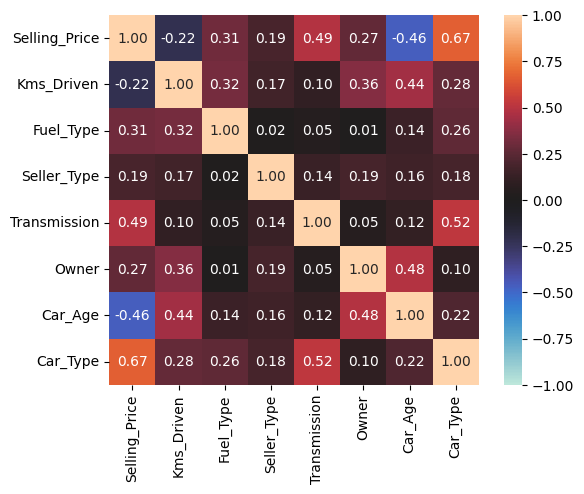

In [ ]:
associations(df1, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', 
             ax=None, figsize=None, annot=True, fmt='.2f', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, 
             filename=None);

**<u>Insight:</u>**
* As kms_driven is increasing Selling price is decreasing
* Car_Type & Selling price have good correlation between them
* As Car_Age is increasing Selling price is decreasing
* Car_Age & kms_driven have good correlation
* Selling Price & Transmission (Manual/Automatic) have good correlation
* Transmission & Car_Type have good correlation between themselves
* Owner & Car_Age have also good correlation

### Association between all Categorical Features using Theil's U:

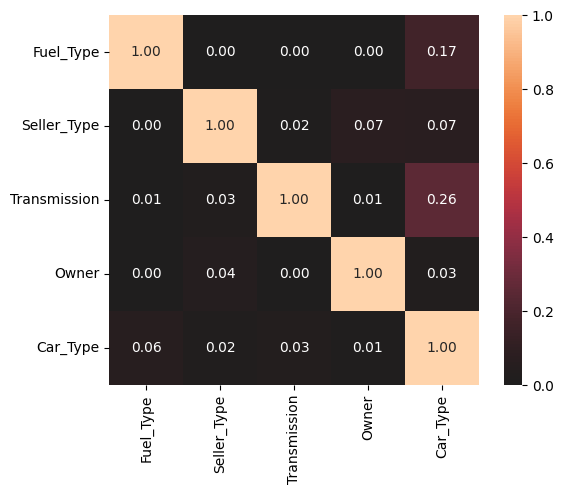

In [ ]:
associations(df1[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner', 'Car_Type']],nom_nom_assoc = 'theil');

**<u>Interpretation:</u>**
* In Theil's U, output value lies btn [0,1]
* It is assymetric: U(x,y) != U(y,x)
* It means knowing y means we know x; but not vice-versa
* Here we can't see any significant relationship between any two categorical features

### Correlation between all features (using Pearson & Theil's U):

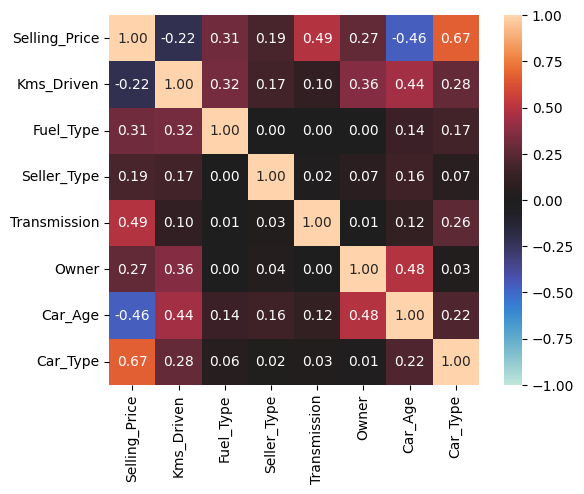

In [ ]:
associations(df1, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='theil', num_num_assoc='pearson', 
             ax=None, figsize=None, annot=True, fmt='.2f', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, 
             filename=None);

**<u>Insight:</u>**
* As kms_driven is increasing Selling price is decreasing
* Car_Type & Selling price have good correlation between them
* As Car_Age is increasing Selling price is decreasing
* Car_Age & kms_driven have good correlation
* Selling Price & Transmission (Manual/Automatic) have good correlation
* Owner & Car_Age have also good correlation

Same Interpretation as above

### Seperating Target & Input Features:

In [ ]:
y = df1['Selling_Price']
X = df1.drop(['Selling_Price'],axis=1)

In [ ]:
X.shape

(3414, 7)

In [ ]:
y.shape

(3414,)

In [ ]:
X.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Car_Type
0,70000,Petrol,Individual,Manual,First Owner,16,Maruti
1,50000,Petrol,Individual,Manual,First Owner,16,Maruti
2,100000,Diesel,Individual,Manual,First Owner,11,Hyundai
3,46000,Petrol,Individual,Manual,First Owner,6,Datsun
4,141000,Diesel,Individual,Manual,Second Owner,9,Honda


### Applying Min-Max Normalization:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
num_ip_cols = X.select_dtypes(include=np.number).columns.tolist()

In [ ]:
X[num_ip_cols] = scaler.fit_transform(X[num_ip_cols])

In [ ]:
X.head()

,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age,Car_Type
0,0.199998,Petrol,Individual,Manual,First Owner,0.500000,Maruti
1,0.142855,Petrol,Individual,Manual,First Owner,0.500000,Maruti
2,0.285712,Diesel,Individual,Manual,First Owner,0.333333,Hyundai
3,0.131426,Petrol,Individual,Manual,First Owner,0.166667,Datsun
4,0.402855,Diesel,Individual,Manual,Second Owner,0.266667,Honda


### Numerical Feature Importance (F-score):
**H0:** Input feature is not required for predicting output feature <br>
**H1:** Input feature is required for predicting output feature <br>
i/p cols where p < alpha; we will keep those cols

In [ ]:
X1_modf = X[num_ip_cols]
selectKbest = SelectKBest(score_func=f_regression, k=2)
x_k = selectKbest.fit_transform(X1_modf,y)
f_scores = selectKbest.scores_
f_scores = ['{:f}' .format(f_score) for f_score in f_scores]
p_values = selectKbest.pvalues_
p_values = ['{:f}' .format(p_value) for p_value in p_values]
df11 = None
alpha = 0.05
df11 = pd.Series(num_ip_cols).to_frame()
df11.rename(mapper = {0: 'Input_Features'}, axis = 1, inplace = True)
df11['F_Score'] = f_scores
df11['P_Value'] = p_values
df11

,Input_Features,F_Score,P_Value
0,Kms_Driven,165.645203,0.000000
1,Car_Age,920.512019,0.000000


Here we can see; both numerical features: Kms_Driven & Car_Age are important to predict the selling price.<br>
Preciously Car_Age has more importance compared to Kms_Driven

### One-Hot Encoding for Categorical Features:

In [ ]:
X = pd.get_dummies(X, drop_first=True)

### Train-Test split:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [ ]:
x_train.shape

(2389, 41)

In [ ]:
y_train.shape

(2389,)

In [ ]:
x_test.shape

(1025, 41)

In [ ]:
y_test.shape

(1025,)

In [ ]:
# purpose: Variable Selection
!pip install featurewiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.6/110.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 11.5 MB/s eta 0:00:00
  Created wheel for feather-format: filename=feather_format-0.4.1-py3-none-any.whl size=2440 sha256=f481e988ce60265f72f612a9c8a8e8c282d12bd483db38f91c213d371079f6ee
  Stored in directory: /root/.cache/pip/wheels/a6/ff/5d/4f10de26fe5ddef243c97f13c6cf579d7353d659e41a05c3a6
Successfully built feather-format
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8

## Model Implementation:


### OLS:

In [ ]:
import statsmodels.api as sm
x_train_modf = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_modf)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     138.1
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        05:29:32   Log-Likelihood:                -33202.
No. Observations:                2389   AIC:                         6.648e+04
Df Residuals:                    2350   BIC:                         6.671e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Modified OLS:

In [ ]:
eliminated_cols = ['Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Owner_Fourth & Above Owner', 
                   'Car_Type_Chevrolet', 'Car_Type_Daewoo', 'Car_Type_Datsun', 'Car_Type_Fiat', 'Car_Type_Ford', 'Car_Type_Honda', 'Car_Type_Hyundai',
                   'Car_Type_MG', 'Car_Type_Mahindra', 'Car_Type_Maruti', 'Car_Type_Nissan', 'Car_Type_OpelCorsa', 'Car_Type_Renault', 'Car_Type_Skoda', 
                   'Car_Type_Tata', 'Car_Type_Toyota', 'Car_Type_Volkswagen']
x_train_modf1 = x_train_modf.drop(eliminated_cols, axis=1)
result1 = sm.OLS(y_train, x_train_modf1).fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        05:29:36   Log-Likelihood:                -33392.
No. Observations:                2389   AIC:                         6.682e+04
Df Residuals:                    2371   BIC:                         6.692e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x_test_modf = x_test.copy()
x_test_modf1 = x_test_modf.drop(eliminated_cols, axis=1)
x_test_modf1 = sm.add_constant(x_test_modf1)
y_pred_mlr = result1.predict(x_test_modf1)
mlr_test_score = np.round(r2_score(y_test, y_pred_mlr),4)
print('Test R2 = ', mlr_test_score)
# mlr_rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_mlr))
# print('Test RMSLE = ', mlr_rmsle)

Test R2 =  0.6183


In [ ]:
sum(y_pred_mlr < 0)

62

**Linear Regression is not reliable here**

### Decision Tree

In [ ]:
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(x_train, y_train)
y_pred_dt_test = dt.predict(x_test)
dt_train_accuracy = dt.score(x_train, y_train)
dt_test_accuracy = dt.score(x_test, y_test)
print('Train Score = ', dt_train_accuracy)
print('Test Score  = ', dt_test_accuracy)
print('RMSLE value  = ', np.sqrt(mean_squared_log_error(y_test, y_pred_dt_test)))

Train Score =  0.9889102085444034
Test Score  =  0.47519252816434787
RMSLE value  =  0.5243944715232887


### Finding Optimum Max_Depth value to reduce Overfitting through Cross Validation:

In [ ]:
avg_train_list = []
avg_test_list = []
avg_train_rmse_list = []
avg_test_rmse_list = []

for depth in range(1,16):
    dtc_1 = DecisionTreeRegressor(max_depth=depth)
    dtc_cv1 = cross_validate(dtc_1, X, y, scoring=['r2','neg_root_mean_squared_error'], cv=10, 
                             return_train_score=True)
    dtc_avg_train_r2 = dtc_cv1['train_r2'].mean()*100
    avg_train_list.append(dtc_avg_train_r2)
    dtc_avg_train_rmse = dtc_cv1['train_neg_root_mean_squared_error'].mean()
    avg_train_rmse_list.append(dtc_avg_train_rmse)
    dtc_avg_test_r2 = dtc_cv1['test_r2'].mean()*100
    avg_test_list.append(dtc_avg_test_r2)
    dtc_avg_test_rmse = dtc_cv1['test_neg_root_mean_squared_error'].mean()
    avg_test_rmse_list.append(dtc_avg_test_rmse)
    dtc_1 = ''

temp_df1 = pd.DataFrame()
temp_df1['max depth'] = range(1,16)
temp_df1['avg train score'] = avg_train_list
temp_df1['avg train neg rmse'] = avg_train_rmse_list
temp_df1['avg test neg rmse'] = avg_test_rmse_list
temp_df1.set_index(['max depth'], inplace=True)
temp_df1

,avg train score,avg train neg rmse,avg test neg rmse
max depth,,,
1,23.903550,-404509.332821,-401166.599399
2,44.091721,-346731.660984,-343676.638779
3,53.668429,-315650.619269,-329779.117174
4,61.949392,-286060.830244,-323124.106693
5,68.993140,-258210.114406,-328522.392967
6,74.106664,-235937.603169,-308242.064764
7,78.927168,-212706.050190,-305504.447065
8,82.639577,-192909.675547,-301890.063958
9,85.709052,-174859.129728,-305491.043518


Optimum value of max_depth = 6

### Decision Tree with Optimized Hyperparameter:

In [ ]:
dtc_2 = DecisionTreeRegressor(random_state=1234, max_depth=6)
dtc_2.fit(x_train, y_train)
y_pred_dtc2_test = dtc_2.predict(x_test)
dtc2_train_accuracy = dtc_2.score(x_train, y_train)
dtc2_test_accuracy = dtc_2.score(x_test, y_test)
dtc2_rmse = np.sqrt(mean_squared_log_error(y_test, y_pred_dtc2_test))

print('Train Score = ', dtc2_train_accuracy)
print('Test Score  = ', dtc2_test_accuracy)
print('RMSLE value = ', dtc2_rmse)

Train Score =  0.7660455338617262
Test Score  =  0.5827928402848899
RMSLE value =  0.45260124856955575


### Random Forest:

In [ ]:
rf = RandomForestRegressor(random_state=1234)
rf.fit(x_train, y_train)
y_pred_rf_test = rf.predict(x_test)
rf_train_accuracy = rf.score(x_train, y_train)
rf_test_accuracy = rf.score(x_test, y_test)
rf_rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_rf_test))
print('Train Score = ', rf_train_accuracy)
print('Test Score  = ', rf_test_accuracy)
# print('RMSE value  = ', np.sqrt(mean_squared_error(y_test, y_pred_rf_test)))
print('RMSLE value = ', rf_rmsle)

Train Score =  0.9508060503098862
Test Score  =  0.6506835404814681
RMSLE value =  0.41783292362465146


The above train & test score clearly depicts the Overfitting Situation.

### Visualization of Feature Importance using Random Forest:

In [ ]:
fdf = pd.DataFrame()
fdf['input feature names'] = x_train.columns
fdf['feature importance'] = rf.feature_importances_
fdf.sort_values(by=['feature importance'], ascending=True, inplace=True)
fig = px.bar(fdf, x='feature importance', y='input feature names', orientation='h')
fig.update_layout(height=800, title='Feature Importance')
fig.show()

### Hyperparameter tuning of Random Forest Regressor (RandomizedSearchCV):

In [ ]:
rf_1 = RandomForestRegressor(random_state=1234)

rf_params = {'n_estimators':[10,20,50,70], 
             'max_depth': [2,6,10,12,15,18],
             'min_samples_split':[2,6,10,20], 
             'min_samples_leaf':[2,5,7]}

random_search_rf = RandomizedSearchCV(estimator=rf_1, 
                                      param_distributions=rf_params,
                                      n_iter=10,
                                      scoring='neg_root_mean_squared_error', 
                                      cv=10, 
                                      random_state=1234, 
                                      return_train_score=True)

random_search_rf.fit(x_train, y_train)
random_search_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_depth': 10}

### Random Forest with Optimized Hyper-parameter:

In [ ]:
rf2 = RandomForestRegressor(random_state=1234, n_estimators= 50, max_depth=10, min_samples_split=20, min_samples_leaf=2)
rf2.fit(x_train, y_train)
y_pred_rf2_test = rf2.predict(x_test)
rf2_train_accuracy = rf2.score(x_train, y_train)
rf2_test_accuracy = rf2.score(x_test, y_test)
rf2_rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_rf2_test))
print('Train Score = ', rf2_train_accuracy)
print('Test Score  = ', rf2_test_accuracy)
print('RMSLE value = ', rf2_rmsle)

Train Score =  0.8036622206350694
Test Score  =  0.6491297994646075
RMSLE value =  0.4019290380180354


### Summary:

In [ ]:
summary = pd.DataFrame()
summary['model'] = ['Decision Tree', 'Random Forest']
summary['Train R2'] = [0.76604, 0.80366]
summary['Test R2'] = [0.58279, 0.64912]
summary['RMSLE'] = [0.45260,0.40193]
summary.set_index('model', inplace=True)
summary

,Train R2,Test R2,RMSLE
model,,,
Decision Tree,0.76604,0.58279,0.45260
Random Forest,0.80366,0.64912,0.40193
